In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

2023-03-19 16:21:15.106412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 16:21:15.580627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 16:21:15.580680: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 16:21:17.250512: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('GoogleStockPrice.csv')
df

Unnamed: 0        Date       Open        High        Low      Close  \
0              0  2013/01/02  18.003504   18.193193  17.931683  18.099348   
1              1  2013/01/03  18.141392   18.316566  18.036036  18.109859   
2              2  2013/01/04  18.251753   18.555305  18.210211  18.467718   
3              3  2013/01/07  18.404655   18.503002  18.282784  18.387136   
4              4  2013/01/08  18.406906   18.425926  18.128880  18.350851   
...          ...         ...        ...         ...        ...        ...   
2531        2531  2023/01/23  97.949997  100.040001  97.500000  99.790001   
2532        2532  2023/01/24  98.099998   99.610001  97.199997  97.699997   
2533        2533  2023/01/25  95.570000   96.160004  93.760002  95.220001   
2534        2534  2023/01/26  96.500000   97.570000  95.379997  97.519997   
2535        2535  2023/01/27  97.309998  100.320000  97.309998  99.370003   

      Adj Close     Volume  
0     18.099348  101550348  
1     18.109859   92635272  
2     18.467718  110429460  
3     18.387136   66161772  
4     18.350851   66976956  
...         ...        ...  
2531  99.790001   40005100  
2532  97.699997   33078500  
2533  95.220001   42330000  
2534  97.519997   30114000  
2535  99.370003   33850200  

[2536 rows x 8 columns]

In [34]:
df.shape

(2536, 8)

In [4]:
#Data Preprocessing checking for null values
df.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

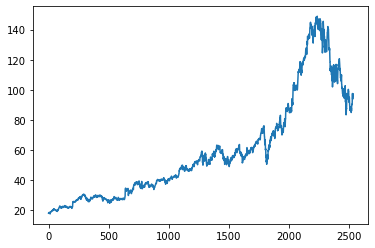

In [5]:
df_high=df.reset_index()['Low']
plt.plot(df_high)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))  

In [7]:
df_high

array([[0.00400231],
       [0.0047959 ],
       [0.00612049],
       ...,
       [0.5806716 ],
       [0.59299155],
       [0.60766908]])

In [8]:
#Split the data into train and test split for prediction 
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]


In [9]:
training_size,test_size

(1902, 634)

In [10]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

    
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [11]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


print(x_train.shape), print(y_train.shape)

(1801, 100, 1)
(1801,)


(None, None)

In [12]:
print(x_test.shape), print(y_test.shape)

(533, 100, 1)
(533,)


(None, None)

In [13]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')   #mean squared error or loss
model.summary()

2023-03-19 16:21:28.249615: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-19 16:21:28.250037: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-19 16:21:28.250092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yashraj-IdeaPad-3-15ADA05-Ua): /proc/driver/nvidia/version does not exist
2023-03-19 16:21:28.250990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
29/29 [==============================] - 20s 297ms/step - loss: 0.0111 - val_loss: 0.0043
Epoch 2/100
29/29 [==============================] - 8s 266ms/step - loss: 5.1300e-04 - val_loss: 0.0021
Epoch 3/100
29/29 [==============================] - 9s 300ms/step - loss: 2.4552e-04 - val_loss: 0.0019
Epoch 4/100
29/29 [==============================] - 10s 329ms/step - loss: 2.3330e-04 - val_loss: 0.0025
Epoch 5/100
29/29 [==============================] - 8s 287ms/step - loss: 2.2082e-04 - val_loss: 0.0024
Epoch 6/100
29/29 [==============================] - 10s 337ms/step - loss: 2.3869e-04 - val_loss: 0.0019
Epoch 7/100
29/29 [==============================] - 11s 365ms/step - loss: 2.1594e-04 - val_loss: 0.0023
Epoch 8/100
29/29 [==============================] - 11s 390ms/step - loss: 2.0879e-04 - val_loss: 0.0031
Epoch 9/100
29/29 [==============================] - 9s 321ms/step - loss: 2.0862e-04 - val_loss: 0.0024
Epoch 10/100
29/29 [==============================] - 

In [14]:
#Lets predict and check performance metrics

#Transform back to original form
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

121.42387312401564

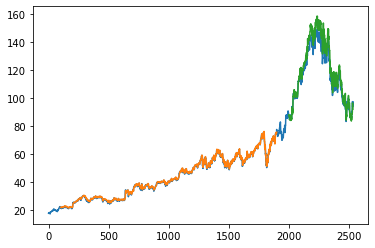

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [15]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [15]:
#Predict the next 28 days Stock Price
len(test_data), x_test.shape

(634, (533, 100, 1))

In [58]:
x_input = test_data[600:].reshape(1,-1)
x_input.shape

(1, 34)

In [59]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 34 into shape (1,100,1)

In [60]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [61]:
day_new.shape

(100,)

In [62]:
day_pred.shape

(28,)

In [63]:
df3 = df_high.tolist()
df3.extend(lst_output)

len(df_high)

2536

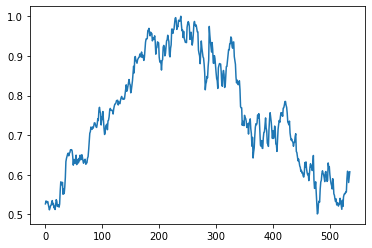

In [64]:
df3=df_high.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

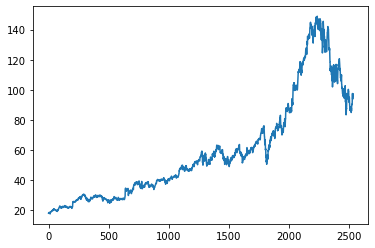

In [65]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)